# **Implementación de las hipotesis**

Informe final **Grupo 9**

Jan Polanco\
Keyner Martínez\
Jorge Mora\
Juan Paz

## Conjunto de Datos de Yelp

Pendiente por agregar mas informacion.

### Contenido del Dataset
- **review_id:**
- **user_id:**
- **business_id:**
- **stars:**
- **useful:**
- **funny:**
- **cool:**
- **text:**
- **date:**

Para acceder a la versión más reciente del conjunto de datos proporcionada por IBM, visite el siguiente enlace: [Yelp Dataset](https://javerianacaliedu-my.sharepoint.com/:f:/g/personal/abuss_javerianacali_edu_co/EqgSYnRKWYNEmAwYE7-_-TYBISFAsGx31Etz73geJ1fXxA?e=vQJNLk ).

# Rubrica de evaluación

| Criterios                     | Nivel 1 | Nivel 2 | Nivel 3 | Nivel 4 | Puntuación del criterio |
|-------------------------------|---------|---------|---------|---------|------------------------|
| Preparación de datos          | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Procesamiento de datos numéricos | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Procesamiento de datos textuales | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Estimación del número de clusters a generar | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5          |
| Construcción del modelo       | 0 puntos| 0.2 puntos| 0.4 puntos| 0.5 puntos| /0.5                  |
| Evaluación de los resultados  | 0 puntos| 0.4 puntos| 0.8 puntos| 1.25 puntos| /1.25                |
| Análisis de los resultados    | 0 puntos| 0.4 puntos| 0.8 puntos| 1.25 puntos| /1.25                |


## Etapa 1: Entedimientos de los datos

Para descargar los datos, se ha decidido crear un repositorio para que de forma más cómoda y ágil, se pueda cargar el dataset.

Para ello se han surtido los siguientes pasos:

1. Crear un repositorio en Github para extraer la data.
2. Convertir el dataset original de formato json a parquet. Esto lo reduce a la mitad en tamaño
3. Instalar librerías para comprimir y reintegrar el archivo en el entorno de ejecución de la notebook de google.

Para lo anterior proponemos el siguiente código:


In [4]:
local = True
if local:
    print("Cualquier cosa:")
else:
    !apt-get install unrar
    !apt-get install rar
    !pip install tiktoken
    !pip install patool
    import patoolib
    !git clone https://github.com/hamsomp3/trabajo-final.git
    %cd trabajo-final/dataset

Cualquier cosa:


A continuación señalamos las librerías que se utilizarán a lo largo del desarrollo del presente ejercicio:

In [5]:
import os
import shutil
import subprocess
import re
import tiktoken
import numpy as np
import pandas as pd
import pathlib as pl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import string
import nltk
from nltk.tokenize import WordPunctTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hamso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
current_path    = pl.Path.cwd()
new_folder      = current_path.joinpath('img').mkdir(exist_ok=True)
img_path        = current_path.joinpath('img')

In [7]:
def extract_rar_files(path_to_rar_directory):
    # Encuentra todos los archivos .rar en la carpeta especificada
    rar_files = sorted([os.path.join(root, file)
                        for root, dirs, files in os.walk(path_to_rar_directory)
                        for file in files if file.endswith('.rar')])

    # Comprueba si hay archivos rar y si 'unrar' está instalado
    if rar_files and shutil.which('unrar'):
        # Intenta extraer el primer archivo .rar, que debería extraer todos los demás
        first_rar = rar_files[0]
        try:
            subprocess.check_output(['unrar', 'x', '-o+', first_rar, path_to_rar_directory])
            print(f"Extraction complete for: {first_rar}")
        except subprocess.CalledProcessError as e:
            print(f"An error occurred while extracting {first_rar}: {e.output}")
    else:
        print("No RAR files to extract or 'unrar' is not installed.")

In [8]:
path_to_rar_directory = '/content/trabajo-final/dataset'

In [9]:
extract_rar_files(path_to_rar_directory)

No RAR files to extract or 'unrar' is not installed.


In [10]:

if local:
    df = pd.read_parquet(current_path.parent.joinpath('yelp_academic_dataset_review_FL.parquet'))
else:
    df = pd.read_parquet('/content/trabajo-final/dataset/yelp_academic_dataset_review_FL.parquet')
df = df.sample(50000, random_state=1001)
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
750832,Te8_04uKwNa3JlU3FhP_lA,2SbO2QwjvSA1s3OsyBHlHQ,f-xTgL53Bd_zPsDTn1_37g,4.0,0,0,0,Went to see a movie this evening and was disap...,2019-12-31 05:05:38
709534,UOadBAGyp6ctjqHg6FQUzA,133riPDyZ45nsBk9_t29wA,_94_FAiPqGauzHfa4SahcA,3.5,0,0,0,The food was over seasoned and not worth the p...,2015-02-12 22:50:26
1053918,Ebn2IJZdXXNckXJ6RjFgQA,ZqEdxDDIGeInfR30_S0r5A,DNw6b7igXQxm3rQkhhV8OA,4.0,3,0,0,I am so grateful to Paws pet grooming. My dog ...,2014-11-16 04:18:45
356589,r7sCSGGdPw3R_uYD6dflBg,g99wh6Tkcr1zgcC6vDPZWQ,898K8ftMbdWe2Dc67QMC_Q,4.0,0,1,0,Great breakfast had the crap and shrimp omelet...,2016-10-05 14:15:47
383709,o1X2MDs4e9H3dQcfUqkuiw,NDRP_nF-ZnhZI-9FbtHF3A,3WySw_caRJy7YVPLlWtBRw,4.0,0,0,0,Excellent! Very impressed. Definitely a 'Hidd...,2013-06-19 09:15:13


Hasta aquí es importante mencionar que para desarrollar el ejercicio hemos decidido trabajar con un sub sample de un tamaño de 50 mil observaciones del 1,161,545 de observaciones iniciales.

Lo anterior se explica por el bajo nivel de rendimiento para poder aplicar el preprocesamiento de la variable text, que llegaba al punto de consumir toda la RAM de 12.7 GB de la que google colab dispone para tal efecto.

Se hicieron pruebas con sub muestras de 500 mil, 300 mil, 100 mil, 50 mil y 10 mil observaciones. Se considera la submuestra de 50 mil observaciones por el relativo buen rendimiento, además de tener parámetros estadísticos similares al de las submuestras grandes.

# Descripción de Variables en Reseñas

Cada reseña en el sistema contiene varias variables que proporcionan información detallada sobre la opinión del usuario y el negocio revisado. A continuación, se detalla cada variable y su significado:

## Variables

### `review_id`
- **Tipo**: `string`
- **Descripción**: Identificador único de 22 caracteres para cada reseña.

### `user_id`
- **Tipo**: `string`
- **Descripción**: Identificador único de 22 caracteres para el usuario que escribe la reseña. Se vincula con el usuario en `user.json`.

### `business_id`
- **Tipo**: `string`
- **Descripción**: Identificador único de 22 caracteres para el negocio revisado. Se vincula con el negocio en `business.json`.

### `stars`
- **Tipo**: `integer`
- **Descripción**: Calificación en estrellas otorgada por el usuario al negocio. Varía de 1 a 5.

### `date`
- **Tipo**: `string` (formato `YYYY-MM-DD`)
- **Descripción**: Fecha en que se realizó la reseña.

### `text`
- **Tipo**: `string`
- **Descripción**: Texto de la reseña escrita por el usuario.

### `useful`
- **Tipo**: `integer`
- **Descripción**: Número de votos recibidos que indican que la reseña fue útil.

### `funny`
- **Tipo**: `integer`
- **Descripción**: Número de votos recibidos que indican que la reseña fue divertida.

### `cool`
- **Tipo**: `integer`
- **Descripción**: Número de votos recibidos que indican que la reseña fue interesante o "cool".

A continuación, se continúa con la parte de entendimiento de los datos:


In [ ]:
df.dtypes

review_id              object
user_id                object
business_id            object
stars                 float64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

In [ ]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [ ]:
print('El dataset tiene {} filas y {} columnas.'.format(df.shape[0], df.shape[1]))
print("El número de registros es: ", df.shape[0])
print("El número de atributos es: ", df.shape[1])

El dataset tiene 50000 filas y 9 columnas.
El número de registros es:  50000
El número de atributos es:  9


Dadas las descripciones entregadas anteriormente, se verifica la existencia o no de datos nulos, con el objetivo de valorar imputación de los mismos o decidir si continuar sin ellos. Este dataset no tiene datos nulos como se puede apreciar a continuación:

In [ ]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Variables Numéricas

In [ ]:
df.describe().round(3)

,stars,useful,funny,cool
count,50000.000,50000.000,50000.000,50000.000
mean,3.769,1.108,0.286,0.485
std,0.761,3.226,1.479,2.450
min,1.000,0.000,0.000,0.000
25%,3.500,0.000,0.000,0.000
50%,4.000,0.000,0.000,0.000
75%,4.500,1.000,0.000,0.000
max,5.000,169.000,104.000,159.000


1. **Conteo (count)**: Esta fila muestra el número total de valores no nulos en cada columna. En este caso, cada columna del dataset original tiene 1,161,545 entradas, lo que significa que no hay valores nulos en ninguna de las columnas y que el dataset es bastante grande. la muestra para probar el código tiene 50000 observaciones
2. **Media (mean)**: La fila de la media calcula el valor promedio de cada columna. Las puntuaciones promedio (`stars`) son de 3.767 para el dataset completo y de 3.769 para la sub muestra, lo que sugiere una tendencia hacia reseñas positivas, ya que es más cercano a 5 que a 1. Los valores medios de `useful`, `funny` y `cool` son bastante bajos (1.109, 0.285 y 0.494 respectivamente para el dataset completo y 1.108, 0.286 y 0.485 para la submuestra), indicando que, en promedio, las reseñas reciben pocos votos que se marcan a menudo como útiles, divertidas o cool.
3. **Desviación estándar (std)**: Esta fila muestra la variabilidad o dispersión de los datos. Para `stars`, una desviación estándar de 0.762 para el dataset completo y 0.761 para la submuestra, lo que indica que indica que la mayoría de las puntuaciones están dentro de un rango relativamente estrecho alrededor del promedio. Las desviaciones estándar de `useful`, `funny` y `cool` sugieren una leve variabilidad en cómo los usuarios votan las reseñas con estas etiquetas.
4. **Mínimo (min)**: El mínimo es el valor más bajo en cada columna. Interesantemente, las columnas `useful`, `funny` y `cool` tienen valores mínimos negativos (-1) en el dataset completo, lo que podría ser un error ya que no se esperarían votos negativos en estas categorías.Para la submuestra, el resultado es de cero como mínimo.
5. **Percentiles (25%, 50%, 75%)**: Estos valores describen la distribución de los datos.
   - El percentil 25% indica que el 25% de las puntuaciones son de 3.5 o inferiores para las `stars`.
   - El percentil 50%, o mediana, muestra que la mitad de las puntuaciones son de 4.0 o inferiores para las `stars`.
   - El percentil 75% indica que el 75% de las puntuaciones son de 4.5 o inferiores para las `stars`.
   Los mismos resultados de distribución del dataset completo se replican en la submuestra.
6. **Máximo (max)**: El valor más alto en cada columna. En `stars`, el máximo es 5, que es la puntuación más alta posible. Para `useful`, `funny` y `cool`, la cantidad máxima de votos son 227, 159 y 207 respectivamente para el dataset completo y 169, 104 y 159 para la muestra de 50000 observaciones respectivamente.

Por ejemplo, para "funny" la máxima calificación es la siguiente:

In [ ]:
use_max = df.loc[df['useful'].idxmax()]
print(use_max)

review_id                                 gpzYkdYwzAgoWA0fqJ7xAQ
user_id                                   JjXuiru1_ONzDkYVrHN0aw
business_id                               QBiNLoutKIgS6lzGks-50A
stars                                                        3.5
useful                                                       169
funny                                                         97
cool                                                         159
text           My wife and I differ on vacation destinations....
date                                         2021-07-20 01:43:24
Name: 450833, dtype: object


In [ ]:
use_max[7]

"My wife and I differ on vacation destinations. While the given common denominators are we both want to be with each other and we both want the destination to have beautiful views & water... that looks different in my mind's eye versus hers. \n\nIn my mind, I want to be in the mountains hiking waterfalls, scenic overlooks and peaks. But my wife prefers the sound of ocean water lapping against the shore, deep sunsets and miles of beaches. Well if you follow my reviews you undoubtedly have noticed I've done a lot of hiking to a lot of waterfalls during the first half of this year. Primarily because they are easy and inexpensive day trips or short weekend getaways, but also because hiking is better in cooler weather. However, now that the heat has arrived and summer is in full swing, I dare not lose my life telling my wife we are going to the mountains again. Besides, SHE booked this trip so I had little say on where we were going! LOL \n\nOur credit card often invites us on time share pr

A continuación, presentamos un análisis gráfico de la distribución de las variables numéricas:

In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns
print(numerical_features)

Index(['stars', 'useful', 'funny', 'cool'], dtype='object')


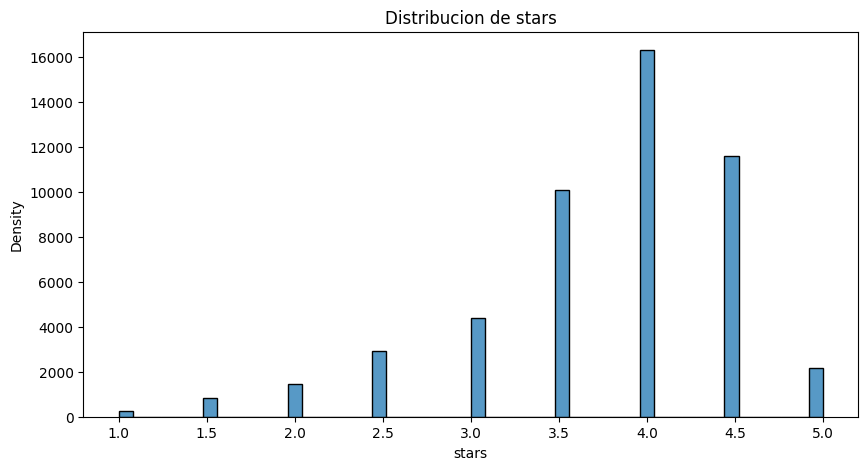

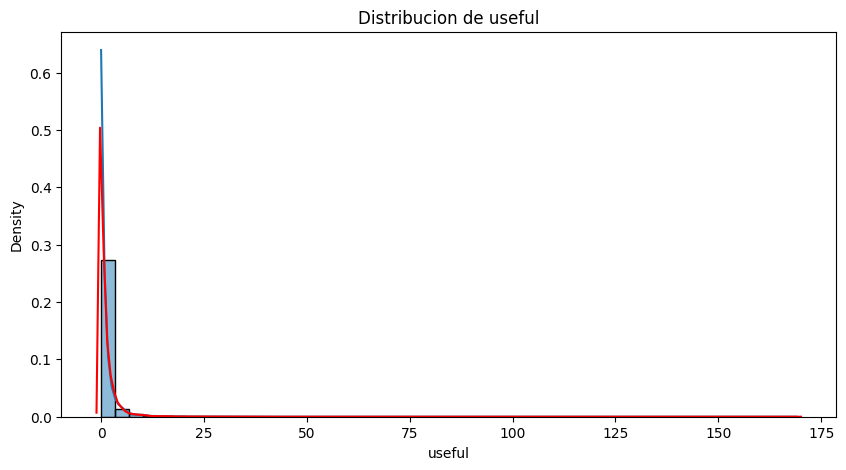

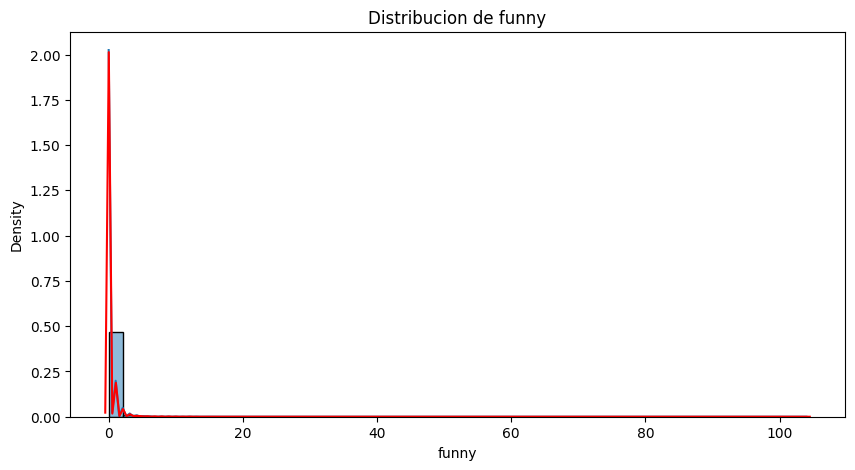

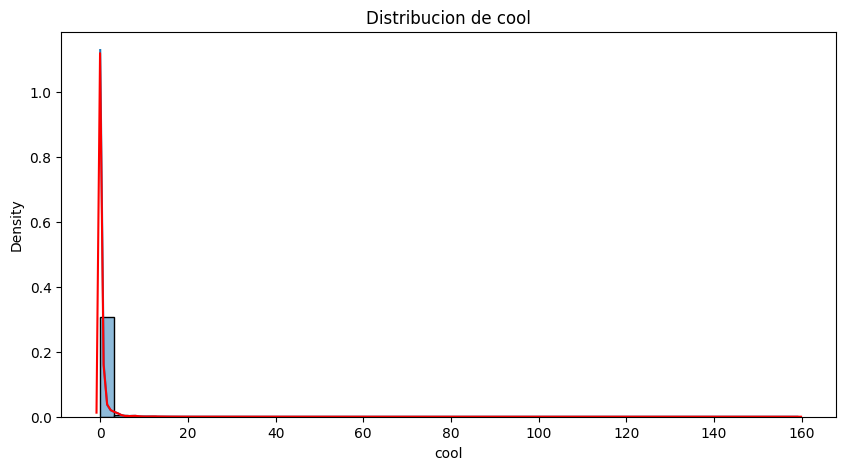

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    plt.title(f'Distribucion de {col}')
    if col == 'stars':
        sns.histplot(df[col], bins=50, kde=False)
    else:
        sns.histplot(df[col], bins=50, kde=True, stat='density')
        sns.kdeplot(df[col], color='red')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.savefig(img_path.joinpath(f'density_{col}_plot.png'))
    plt.show()

Como complemento del anterior análisis podemos mencionar:

1.   En general los sentimientos de las reseñas son positivos. La clase modal en las calificaciones es de 4 y la media se aproxima a ese valor.
2.   Los atributos "useful", "funny" y "cool" en su mayoría registan valores de ceros. En la distribución de hecho no es posible visualizar alguna estructura. Bajo este supuesto, este tipo de variables puede no tener relevancia en el presente estudio.


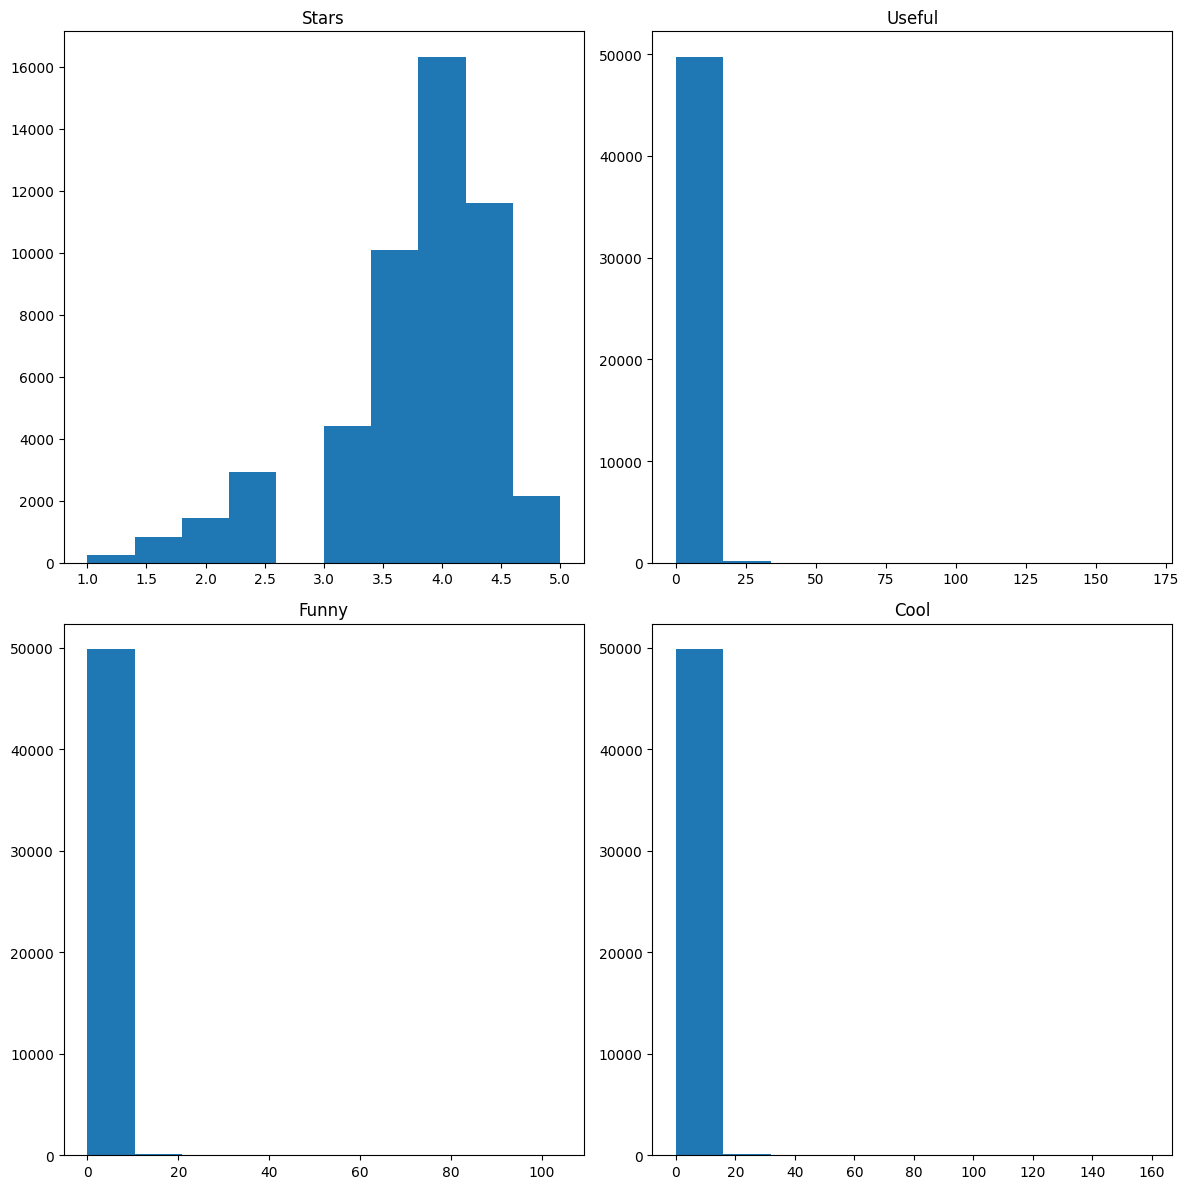

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), squeeze=False)
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature])
    axes[i].set_title(feature.capitalize())

fig.tight_layout()
plt.savefig(img_path.joinpath('numerical_features_plot.png'))
plt.show()

# Procesamiento de datos textuales

El ejercicio de clusterización en el presente informe hace foco sobre la variable "text" del dataset, que en esencia contiene el texto escrito por quien elaboró la reseña. Estas reseñas provienen de YELP.

De acuerdo con reseña analizada en Internet, Yelp fue fundada en 2004 por Russel Simmons y Jeremy Stoppelman en San Francisco, California. Originalmente la empresa se llamaba "Yelp: The Yellow Pages Reinvented" y la idea era crear un sitio web donde la gente pudiera escribir reseñas y recomendaciones sobre negocios locales.

Las reseñas están escritas en idiooma inglés. La mas larga tiene 5000 caracteres o letras, lo cual puede estar explicado por el máximo de caracteres permitido por reseña:

## Ajuste en minúsculas a todo el texto

Este paso se hace con el fin de clasificar mejor todo el texto y optimizar la vectorización del mismo:

In [ ]:
df['text'] = df['text'].str.lower()

## Conteo promedio de letras

Para el efecto mencionado anteriormente, se define una función que defina un contador de catacteres y al tiempo creamos una variable numérica para almacenar este resultado:

In [ ]:
def count_chars(text):
    words = len(text)
    return words

df['num_chars'] = df['text'].apply(count_chars)

In [ ]:
df['num_chars'].describe().round(2)

count    50000.00
mean       533.39
std        505.40
min          1.00
25%        213.00
50%        374.00
75%        673.00
max       5000.00
Name: num_chars, dtype: float64

La media es de 533 caracteres por reseña para el dataset completo, y de 534 para el ajustado a 50000 observaciones bastante más bajo al máximo permitido. La variabilidad es alta, aunque se encuentra que las reseñas más cortas tienen un sólo caracter.

La reseña con menos caracteres en el dataset completo es de 1, y se constituye por un punto "."

En la muestra que se está trabajando, es de 1 caracter con la expresión "k":

In [ ]:
num_chars_max = df.loc[df['num_chars'].idxmax()]
num_chars_min = df.loc[df['num_chars'].idxmin()]

In [ ]:
num_chars_min

review_id      ppqtNy_-1862ekJTFYbLSg
user_id        9Wa-vzA2QmDmbid5_onIVQ
business_id    Y1jceiydoCCvmb9eFGmbwg
stars                             3.0
useful                              0
funny                               0
cool                                0
text                                k
date              2015-10-06 03:04:23
num_chars                           1
Name: 371754, dtype: object

Esta es una de las de 5000 caractéres:

In [ ]:
num_chars_max

review_id                                 BbeW936M1laZhcq5LztQBA
user_id                                   uD6Py10gW2EwDGims3oC1w
business_id                               vEIyiN8vKfWvMXjo628R6g
stars                                                        4.5
useful                                                         0
funny                                                          0
cool                                                           0
text           i've been taking my giant schnauzer to best ca...
date                                         2021-12-18 21:08:30
num_chars                                                   5000
Name: 663006, dtype: object

In [ ]:
num_chars_max[7]

'i\'ve been taking my giant schnauzer to best care for maybe 2-3  years. charlie had his teeth cleaned 4 years ago at a vet i just trust to ther 9\'s in sarasota. i have since been developing a relationship with charlie and dr. elliot. and felt pleased with what had taken place prior to his teeth cleaning. . i was reluctant to have charlie put under at 12 1/2 years however for a dental. and dr. elliot knew this because i told him i tried to clean the hard brown tartar off his teeth myself. but i only got one chunk off 1 tooth. so i followed the protocol-the bloodwork-and urinanalysis. and they both came out normal. i also want to back up a tad. and mention-i had 1 long conversation about everything that was going on with charlie. like i detected what i felt was mild dementia. i thought a lot about this decision to put him under. and i do a lot of research constantly. especially about serious issues concerning mine-and my dogs health. i put a lot of care into my 2 giant schnauzers. i ho

Este es el caso donde la reseña es bastante larga y se consumió los 5000 caracteres que al parecer permite el sistema de reseñas.

Ahora bien, la reseña con mayor conteo de caracteres no necesariamente es la que más palabras tiene. De hecho se puede considerar que el largo en número de catactéres de texto no necesariamente es la reseña que tiene mayor cantidad de palabras.

De esta forma, procedemos con el conteo de promedio de palabras por reseña:

## Conteo promedio de palabras por reseña

Para esto definimos el número de palabras de un texto con el método Split:

In [ ]:
def count_words(text):
  words = text.split()
  return len(words)

df['num_words'] = df['text'].apply(count_words)

In [ ]:
df['num_words'].describe().round(2)

count    50000.00
mean        98.62
std         94.11
min          1.00
25%         39.00
50%         69.00
75%        125.00
max        971.00
Name: num_words, dtype: float64

Los resultados son que las reseñas tienen en promedio 99 palabras tanto para la muestra completa como para la submuestra con una deviación estándar de 96 palabras pra la muestra completa y de 94 palabras para la submuestra, bastante alta.

Tambien tenemos registros de mínimo una palabra por reseña, pero al tiempo tenemos una reseña con un maximo de 1040 palabras en la muestra completa y de 971 palabras para la submuestra.

In [ ]:
num_words_min = df.loc[df['num_words'].idxmin()]
num_words_max = df.loc[df['num_words'].idxmax()]

In [ ]:
num_words_min

review_id      ppqtNy_-1862ekJTFYbLSg
user_id        9Wa-vzA2QmDmbid5_onIVQ
business_id    Y1jceiydoCCvmb9eFGmbwg
stars                             3.0
useful                              0
funny                               0
cool                                0
text                                k
date              2015-10-06 03:04:23
num_chars                           1
num_words                           1
Name: 371754, dtype: object

In [ ]:
num_words_max

review_id                                 2hTL__wxT3bd05VTmRFrDQ
user_id                                   zmlt7zUWY1Bi58_2n7UopQ
business_id                               YWHjn0eLLtdj-w0v4XoNkQ
stars                                                        3.0
useful                                                         4
funny                                                          3
cool                                                           4
text           bistek (think thin beef slices almose like min...
date                                         2014-02-09 21:32:27
num_chars                                                   4990
num_words                                                    971
Name: 469126, dtype: object

In [ ]:
num_words_max[7]

"bistek (think thin beef slices almose like mini steaks) - it's prepared with soy sauce, lemon or calamansi juice, and onions; there's more but this isn't a recipe, it's a review.  the bistek here was ok, and i only ordered it once so i don't know if it's the same everytime.  the meat itself was flavorful and went well with the rice but it was more on the oily side.  i usually spoon out the extra oil after it settles when cooking but i guess just add more rice for this one.  my grade: c+, if you haven't eaten many bistek dishes then you would most likely give it a b+ to a-.  hmm maybe i'll keep the grading in this format.  my grade and then a grade for one that hasn't had the opportunity to eat the same dish at many differing places.  so for this review, my grade and newbie grade.  dinuguan (pork meat gravy type dish sometimes with chilies) - this is a filipino favorite but i don't want to go into the very specifics... i'll just say that it's really good with rice, make sure you have y

## Conteo promedio de palabras por token

En este paso consideramos crear "tokens" para facilitar el proceso de vectorización de texto y mejorar el rendimiento del modelo en general.

In [ ]:
text = df.text.to_list()
print(text[0])

went to see a movie this evening and was disappointed at the experience. the movie was sat 10 minutes late which rushed the ordering and dinner process. the seat had food stuck to it that had to be cleaned before we could sit. the server apologized and offered a free dessert. that was nice until i realized she charged us $9.50 for the "free" dessert. the dessert was not worth $2.00 but i assume the waitress enjoyed the extra tip percentage since it is already added to the check. the extra $10 on the bill made her a couple extra bucks in automatic tip. food was not great either. for two alcoholic drinks and appetizer and a meal it cost us over $140.00 for two people when you add in the cost of the ticket. not worth it at all. if you are going to this theater and want dinner, go to one of the nice restaurants in hyde park.


In [ ]:
encoding = tiktoken.get_encoding("cl100k_base")

def count_tokens_gpt4(text):
    num_tokens = len(encoding.encode(text))
    return num_tokens

df['num_tokens-gpt4'] = df['text'].apply(count_tokens_gpt4)

In [ ]:
df['num_tokens-gpt4'].describe().round(2)

count    50000.00
mean       120.72
std        115.05
min          1.00
25%         48.00
50%         84.00
75%        152.00
max       1259.00
Name: num_tokens-gpt4, dtype: float64

In [ ]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,num_chars,num_words,num_tokens-gpt4
750832,Te8_04uKwNa3JlU3FhP_lA,2SbO2QwjvSA1s3OsyBHlHQ,f-xTgL53Bd_zPsDTn1_37g,4.0,0,0,0,went to see a movie this evening and was disap...,2019-12-31 05:05:38,832,160,187
709534,UOadBAGyp6ctjqHg6FQUzA,133riPDyZ45nsBk9_t29wA,_94_FAiPqGauzHfa4SahcA,3.5,0,0,0,the food was over seasoned and not worth the p...,2015-02-12 22:50:26,364,69,85
1053918,Ebn2IJZdXXNckXJ6RjFgQA,ZqEdxDDIGeInfR30_S0r5A,DNw6b7igXQxm3rQkhhV8OA,4.0,3,0,0,i am so grateful to paws pet grooming. my dog ...,2014-11-16 04:18:45,746,147,184
356589,r7sCSGGdPw3R_uYD6dflBg,g99wh6Tkcr1zgcC6vDPZWQ,898K8ftMbdWe2Dc67QMC_Q,4.0,0,1,0,great breakfast had the crap and shrimp omelet...,2016-10-05 14:15:47,213,35,48
383709,o1X2MDs4e9H3dQcfUqkuiw,NDRP_nF-ZnhZI-9FbtHF3A,3WySw_caRJy7YVPLlWtBRw,4.0,0,0,0,excellent! very impressed. definitely a 'hidd...,2013-06-19 09:15:13,479,79,118


In [ ]:
stop_words = set(stopwords.words('english'))
def count_tokens(text):
    token = WordPunctTokenizer().tokenize(text)
    clean_token=[]
    for tok in token:
        tok = tok.lower()
        new_token = re.sub(r'[^a-zA-Z]+', '', tok)
        if new_token != "" and len(new_token) >= 2:
            vowels=len([v for v in new_token if v in "aeiou"])
            if vowels != 0:
                clean_token.append(new_token)
    return len(clean_token)

df['num_tokens'] = df['text'].apply(count_tokens)

In [ ]:
df['num_tokens'].describe().round(2)

count    50000.00
mean        91.03
std         86.50
min          0.00
25%         36.00
50%         64.00
75%        115.00
max        867.00
Name: num_tokens, dtype: float64

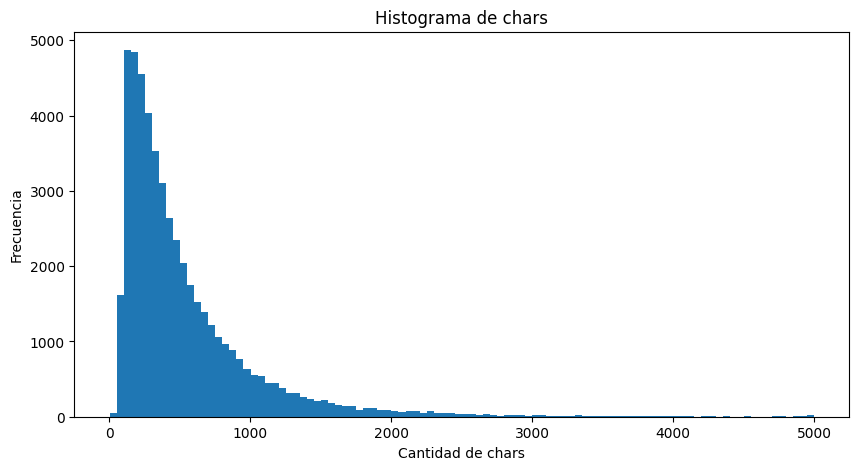

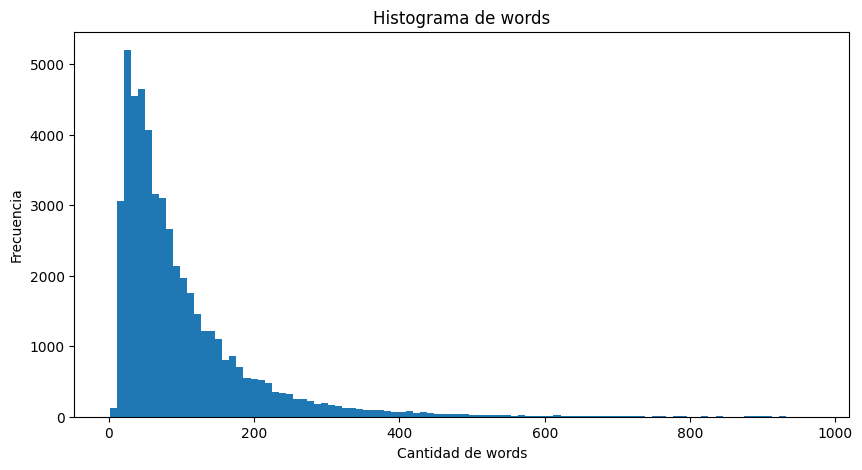

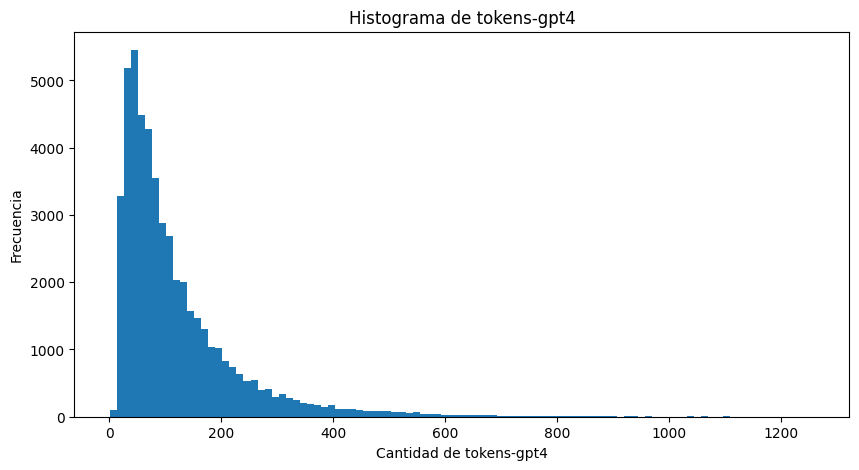

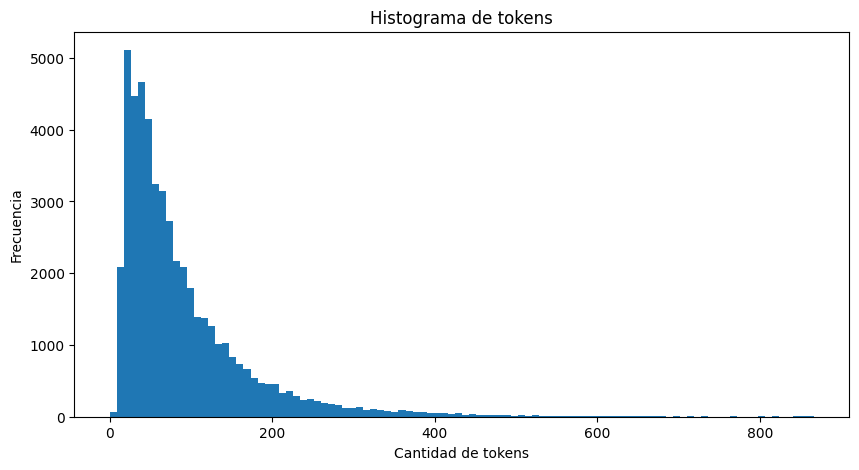

In [ ]:
for col in df.columns[9:]:
    name = col.split('_')[1]
    plt.figure(figsize=(10, 5))
    plt.hist(df[col], bins=100)
    plt.title(f'Histograma de {name}')
    plt.xlabel(f'Cantidad de {name}')
    plt.ylabel('Frecuencia')
    #lt.savefig(img_path.joinpath(f'hist_{name}_plot.png'))
    plt.show()

Como se pudo apreciar gráficamente, la distrubución en las tres variables que caracterizan las dimensiones del atributo "text", se asemeja a chi cuadrado. Son cada vez menos frecuentes las reseñas más largas.

Estos gráficos de distribución aplican para la submuestra de 50000 observaciones.

## Análisis de reseñas a lo largo del tiempo:

Tal y como se menciono anteriormente, YELP arrancó a capturar reseñas en 2004. A partir de ahí, el número de reseñas se ha venido incrementando:


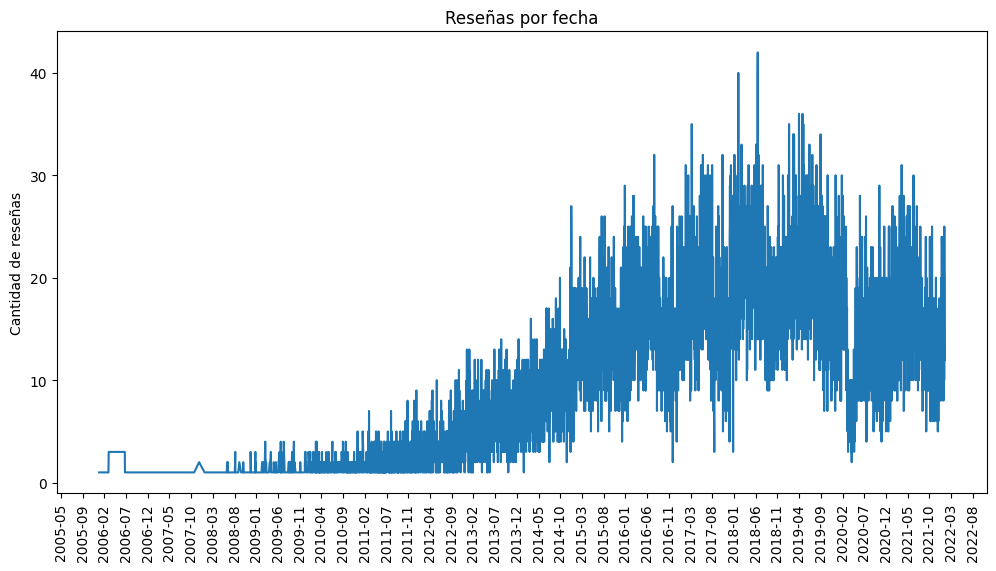

In [ ]:
df['date'] = pd.to_datetime(df['date'])

grouped = df.groupby(df['date'].dt.date).count()['review_id']

plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=150))

plt.title("Reseñas por fecha")
plt.ylabel("Cantidad de reseñas")
plt.xticks(rotation=90)
plt.savefig(img_path.joinpath('reviews_by_date_plot.png'))
plt.show()

El número de reseñas se ha venido aumentando, aunque a partir de 2015 se estabilizan y tienen una conducta estacional.

Esta "estacionalidad" también de puede verificar al momento de graficar el número de reseñas del dataset completo.

## Bag of words

In [ ]:
punc = string.punctuation
stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

A continuación se efectuará la limpieza de texto, definiendo una función para efectuar los siguientes pasos:

1. text.lower(): convierte el texto a minúsculas. Estandariza el caso.
2. ''.join(): elimina la puntuación, dejando solo letras/números.
3. lemmatize: aplica lemmatización a cada palabra (se usa lem para esto) para convertirlas a su raíz.
4. text.split(): tokeniza el texto en palabras individuales.
5. stop_words: filtra aquellas palabras que existen en la lista de stop words definida.


In [ ]:
def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in punc])
    text = [lem.lemmatize(w) for w in text.split() if w not in stop_words]
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
corpus = df['clean_text'].to_list()
corpus1 = [' '.join(text) for text in corpus]

In [ ]:
vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(corpus1)

In [ ]:
list=vectorizer.get_feature_names_out()
list = list.tolist()

In [ ]:
clean_corpus=[]
for tok in list:
    # 1. se convierten todos los caracteres alfabéticos a minúsculas
    tok = tok.lower()
    # 2. se elimia cualquier caracter que no sea alfabético (números, puntuaciones, etc)
    new_list = re.sub(r'[^a-zA-Z]+', '', tok)
    # 3. Finalmente, se eliminan aquellos lists que correspondan a espacios.
    if new_list != "" and len(new_list) >= 2:
        vowels=len([v for v in new_list if v in "aeiou"])
        if vowels != 0: # se remueven aquellos lists que no contienen vocales
            clean_corpus.append(new_list)
print(f"Después de eliminar palabras con RegEx: {len(clean_corpus)}")

Después de eliminar palabras con RegEx: 55618


In [ ]:
print("El tamaño del vocabulario es: ", len(clean_corpus))
print("Las primeras 10 palabras del vocabulario son: ", clean_corpus[:10])

El tamaño del vocabulario es:  55618
Las primeras 10 palabras del vocabulario son:  ['dec', 'oz', 'am', 'am', 'heart', 'wdo', 'wfull', 'zero', 'mi', 'am']


Despues de finalizar la limpieza del texto, contamos con el siguiente dataset. La variable clean_text contiene el resultado de la limpieza del texto.

In [ ]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,num_chars,num_words,num_tokens-gpt4,num_tokens,clean_text
750832,Te8_04uKwNa3JlU3FhP_lA,2SbO2QwjvSA1s3OsyBHlHQ,f-xTgL53Bd_zPsDTn1_37g,4.0,0,0,0,went to see a movie this evening and was disap...,2019-12-31 05:05:38,832,160,187,149,"[went, see, movie, evening, disappointed, expe..."
709534,UOadBAGyp6ctjqHg6FQUzA,133riPDyZ45nsBk9_t29wA,_94_FAiPqGauzHfa4SahcA,3.5,0,0,0,the food was over seasoned and not worth the p...,2015-02-12 22:50:26,364,69,85,63,"[food, seasoned, worth, price, ordered, hibach..."
1053918,Ebn2IJZdXXNckXJ6RjFgQA,ZqEdxDDIGeInfR30_S0r5A,DNw6b7igXQxm3rQkhhV8OA,4.0,3,0,0,i am so grateful to paws pet grooming. my dog ...,2014-11-16 04:18:45,746,147,184,133,"[grateful, paw, pet, grooming, dog, ran, tall,..."
356589,r7sCSGGdPw3R_uYD6dflBg,g99wh6Tkcr1zgcC6vDPZWQ,898K8ftMbdWe2Dc67QMC_Q,4.0,0,1,0,great breakfast had the crap and shrimp omelet...,2016-10-05 14:15:47,213,35,48,33,"[great, breakfast, crap, shrimp, omelette, swe..."
383709,o1X2MDs4e9H3dQcfUqkuiw,NDRP_nF-ZnhZI-9FbtHF3A,3WySw_caRJy7YVPLlWtBRw,4.0,0,0,0,excellent! very impressed. definitely a 'hidd...,2013-06-19 09:15:13,479,79,118,73,"[excellent, impressed, definitely, hidden, gem..."


Asi mismo, generamos la nube de palabras a partir del corpus creado con base en la limpieza de palabras del texto de cada reseña. Esto aplica para las 50000 observaciones:


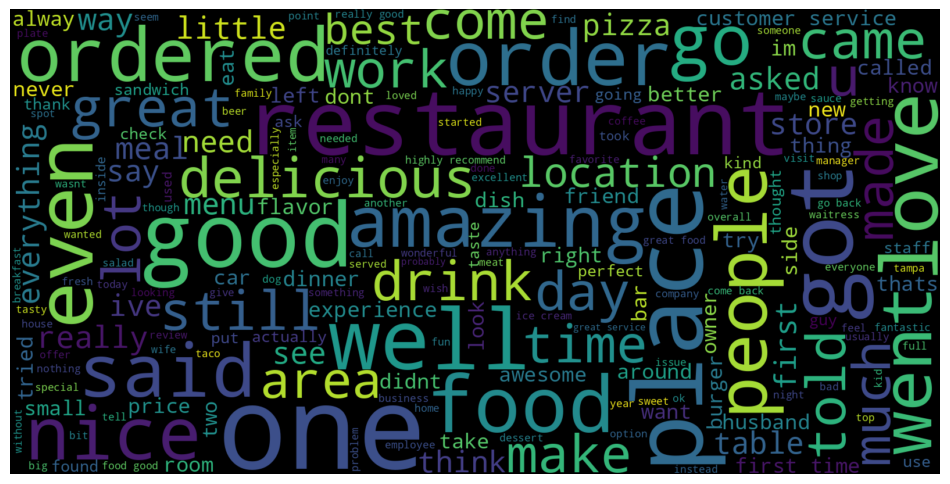

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(corpus1))

# Visualizar la nube de palabras
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.savefig(img_path.joinpath('wordcloud_plot.png'))
plt.show()

Esta nube de palabras viene cargada de calificadores positivos dentro de las reseñas, es dcir palabras como "love", "well", "great", "delicious", y en escalas más reducidas palabras como "problem" o "bad", lo cual es coherente con las reseñas generalmente positivas.


Finalmente, creamos la variable clean_text_corpus a partir del procesamiento que se hizo del vocabulario del todo el corpus. Esto dado que "clean_text" estaba configurado

In [ ]:
df['clean_text_corpus']=corpus1

In [ ]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,num_chars,num_words,num_tokens-gpt4,num_tokens,clean_text,clean_text_corpus
750832,Te8_04uKwNa3JlU3FhP_lA,2SbO2QwjvSA1s3OsyBHlHQ,f-xTgL53Bd_zPsDTn1_37g,4.0,0,0,0,went to see a movie this evening and was disap...,2019-12-31 05:05:38,832,160,187,149,"[went, see, movie, evening, disappointed, expe...",went see movie evening disappointed experience...
709534,UOadBAGyp6ctjqHg6FQUzA,133riPDyZ45nsBk9_t29wA,_94_FAiPqGauzHfa4SahcA,3.5,0,0,0,the food was over seasoned and not worth the p...,2015-02-12 22:50:26,364,69,85,63,"[food, seasoned, worth, price, ordered, hibach...",food seasoned worth price ordered hibachi stea...
1053918,Ebn2IJZdXXNckXJ6RjFgQA,ZqEdxDDIGeInfR30_S0r5A,DNw6b7igXQxm3rQkhhV8OA,4.0,3,0,0,i am so grateful to paws pet grooming. my dog ...,2014-11-16 04:18:45,746,147,184,133,"[grateful, paw, pet, grooming, dog, ran, tall,...",grateful paw pet grooming dog ran tall dry gra...
356589,r7sCSGGdPw3R_uYD6dflBg,g99wh6Tkcr1zgcC6vDPZWQ,898K8ftMbdWe2Dc67QMC_Q,4.0,0,1,0,great breakfast had the crap and shrimp omelet...,2016-10-05 14:15:47,213,35,48,33,"[great, breakfast, crap, shrimp, omelette, swe...",great breakfast crap shrimp omelette sweet pot...
383709,o1X2MDs4e9H3dQcfUqkuiw,NDRP_nF-ZnhZI-9FbtHF3A,3WySw_caRJy7YVPLlWtBRw,4.0,0,0,0,excellent! very impressed. definitely a 'hidd...,2013-06-19 09:15:13,479,79,118,73,"[excellent, impressed, definitely, hidden, gem...",excellent impressed definitely hidden gem clea...


# Análisis de sentimientos

El siguiente paso fue estrictamente necesario dado que al momento de vectorizar el texto y hacer el análisis de clustering, el resultado siempre era el mismo: un solo grupo denominado -1, donde el algoritmo de DBSCAN clasifica a las anomalías o a aquello que no puede clasificar.

De acuerdo con lo investigado, las razones de por qué el texto tokenizado o vectorizado no pudo ser correctamente clasificado es por el tipo de texto. No se trata de noticias tipo feeds o tweets (Red social X), que son mas cortos y pueden tener una estructura u orientación diferente.

Aquí se trata de reseñas que pueden ser muy variadas, ser negativas o positivas o en determinado caso, subjetivas o bastante objetivas. Para mitigar este problema se decidió medir el grado de polaridad (Valores que van de -1 a 1, siendo -1 negativa, 0 neutral y 1 positiva) y el grado de subjetividad (Siendo 1 subjetiva y 0 objetiva).

Esto es de importancia, porque ahora generamos dos atributos numéricos que clasifican a cada reseña con el texto preprocesado con un grado determinado de polaridad y de subjetividad, lo que le permitirá al algoritmo clusterizar con mejor precisión:

In [ ]:
from textblob import TextBlob
from sklearn.metrics import adjusted_rand_score

In [ ]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [ ]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,num_chars,num_words,num_tokens-gpt4,num_tokens,clean_text,clean_text_corpus,polarity,subjectivity
750832,Te8_04uKwNa3JlU3FhP_lA,2SbO2QwjvSA1s3OsyBHlHQ,f-xTgL53Bd_zPsDTn1_37g,4.0,0,0,0,went to see a movie this evening and was disap...,2019-12-31 05:05:38,832,160,187,149,"[went, see, movie, evening, disappointed, expe...",went see movie evening disappointed experience...,0.035714,0.528571
709534,UOadBAGyp6ctjqHg6FQUzA,133riPDyZ45nsBk9_t29wA,_94_FAiPqGauzHfa4SahcA,3.5,0,0,0,the food was over seasoned and not worth the p...,2015-02-12 22:50:26,364,69,85,63,"[food, seasoned, worth, price, ordered, hibach...",food seasoned worth price ordered hibachi stea...,-0.233929,0.464286
1053918,Ebn2IJZdXXNckXJ6RjFgQA,ZqEdxDDIGeInfR30_S0r5A,DNw6b7igXQxm3rQkhhV8OA,4.0,3,0,0,i am so grateful to paws pet grooming. my dog ...,2014-11-16 04:18:45,746,147,184,133,"[grateful, paw, pet, grooming, dog, ran, tall,...",grateful paw pet grooming dog ran tall dry gra...,0.068924,0.552083
356589,r7sCSGGdPw3R_uYD6dflBg,g99wh6Tkcr1zgcC6vDPZWQ,898K8ftMbdWe2Dc67QMC_Q,4.0,0,1,0,great breakfast had the crap and shrimp omelet...,2016-10-05 14:15:47,213,35,48,33,"[great, breakfast, crap, shrimp, omelette, swe...",great breakfast crap shrimp omelette sweet pot...,0.450000,0.792857
383709,o1X2MDs4e9H3dQcfUqkuiw,NDRP_nF-ZnhZI-9FbtHF3A,3WySw_caRJy7YVPLlWtBRw,4.0,0,0,0,excellent! very impressed. definitely a 'hidd...,2013-06-19 09:15:13,479,79,118,73,"[excellent, impressed, definitely, hidden, gem...",excellent impressed definitely hidden gem clea...,0.556061,0.652020


A continuación se ejecuta el modelo de Clusterización. Inicialmente se configuran los hiperparámetros eps en 0.05 y min_samples con un valor de 10. las etiquetas se denominarán clusters, y adicional, tendremos un modelo alterno con una configuración que optimice las métricas.

Las variables objeto de estudio son la subjetividad y la polaridad, las cuales se construyeron a partir del procesamiento y limpieza de la variable Text. Adicionalmente se agrupan con la variable stars. Es importante señalar que con sólo alguna de las variables, el ejercicio de agrupamiento no generaba resultados óptimos.

In [ ]:
# Clusterización DBSCAN
X=df[['subjectivity','polarity','stars'] ]
# Clusterización DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=10)
clusters = dbscan.fit_predict(X)

In [ ]:
import collections
collections.Counter(clusters)

Counter({0: 16038,
         1: 9822,
         2: 11348,
         5: 2697,
         3: 4151,
         4: 1238,
         6: 2032,
         -1: 1509,
         8: 609,
         7: 15,
         9: 40,
         10: 63,
         11: 10,
         12: 31,
         13: 16,
         14: 13,
         22: 22,
         15: 104,
         16: 24,
         17: 38,
         27: 7,
         18: 19,
         19: 56,
         26: 10,
         20: 23,
         21: 10,
         23: 20,
         24: 11,
         28: 10,
         25: 14})

In [ ]:
# Clusterización DBSCAN con diferentes parámetros
dbscan1 = DBSCAN(eps=.10, min_samples=12)
clusters1 = dbscan1.fit_predict(X)

In [ ]:
collections.Counter(clusters1)

Counter({0: 16273,
         1: 10056,
         2: 11536,
         3: 2865,
         4: 4353,
         5: 1412,
         6: 2123,
         -1: 373,
         7: 751,
         8: 15,
         9: 16,
         10: 196,
         11: 14,
         12: 17})

### Resultados preliminares:

La primera modelación generó 30 clústeres diferentes, incluyendo el cluster -1 donde el algoritmo incluye todo lo que no pudo clasificar. Ahora bien, despues de aplicar las métricas de evaluación que se encuentran más adelante, se logra un modelo con 14 clusters.

# Construcción del modelo - DBSCAN


In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    # Convertir X a un numpy array si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.values

    cores = X[core_mask]
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)



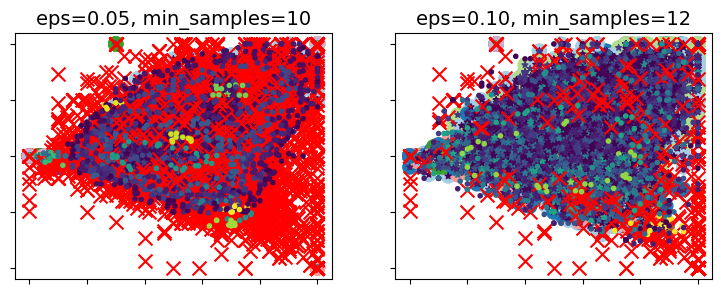

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100, show_ylabels=False, show_xlabels=False)

plt.subplot(122)
plot_dbscan(dbscan1, X, size=100, show_ylabels=False, show_xlabels=False)

plt.show()


#Evaluación de los resultados

Para este efecto, se utiliza el coeficiente de silueta, y los Índices de Calinski-Harabasz y de Davies Bouldin.

El índice de Dunn no se pudo calcular, dado que al intentar calcular el diámetro de cada cluster, la distancia mínima y calcular el coeficiente entre distancia mínima y diámetro máximo del mismo, se tuvo problemas de rendimiento que desactivaban el entorno de ejecución de Google Colab.

Los resultados fueron los siguientes:

In [ ]:
#Evaluación de resultados primer modelo (eps = 0.05, min_samples = 10)

s_score = silhouette_score(X, clusters)
ch_score = metrics.calinski_harabasz_score(X, clusters)
davies_bouldin = metrics.davies_bouldin_score(X, clusters)

print("Coeficiente de silueta:", s_score)
print("Índice Calinski-Harabasz:", ch_score)
print("Índice Davies Bouldin:", davies_bouldin)


Coeficiente de silueta: 0.323914397103305
Índice Calinski-Harabasz: 8409.282506401236
Índice Davies Bouldin: 1.7216710817909522


In [ ]:
#Evaluación de resultados segundo modelo (eps = 0.1, min_samples = 12)

s_score1 = silhouette_score(X, clusters1)
ch_score1 = metrics.calinski_harabasz_score(X, clusters1)
davies_bouldin1 = metrics.davies_bouldin_score(X, clusters1)

print("Silhouette Score:", s_score1)
print("Calinski-Harabasz Index:", ch_score1)
print("Davies Bouldin Index:", davies_bouldin1)


Silhouette Score: 0.46436966576228544
Calinski-Harabasz Index: 26504.32688741614
Davies Bouldin Index: 1.7792533543166855


Al respecto, el segundo modelo, que es el que se va a analizar en adelante, genera mejores resultados en cuando al coeficiente de silueta y con el Índice de Calinski-Harabasz. Obtiene un valor similar con el índice de Davies Bouldin, métrica que es peor que en el primer modelo.

Al respecto se continúa con el segundo modelo entre otras cosas porque su coeficiente de silueta es mejor sin ser espectacular, pero el Índice de Calisnki-Harabasz es muy superior, lo que indica lo siguiente:

* Los clústeres encontrados están muy compactos, con los puntos agrupados fuertemente alrededor del centroide de su clúster (baja varianza intra-clúster).
* Hay una gran separación entre los centroides de cada clúster, es decir, están bien diferenciados (alta varianza inter-clúster).

No obstante, obtenemos un resultado no muy bueno con Davies Bouldin:

* El valor calculado es un puntaje relativamente alto, lo cual no es bueno
* Indica similitud entre algunos clústeres.
* Los centroides no están tan separados como indica Calinski-Harabasz
* Los clústeres probablemente no estén tan bien diferenciados.

Si bien los resultados de este modelo son mejores que los del primero, es posible que se tenga que seguir iterando para encontrar una mejor clusterización.



Finalmente, elaboramos el gráfico de silueta para evaluar los resultados de este coeficiente para el modelo adoptado:

Text(0.5, 1.0, 'Gráfico de silueta para los clusters')

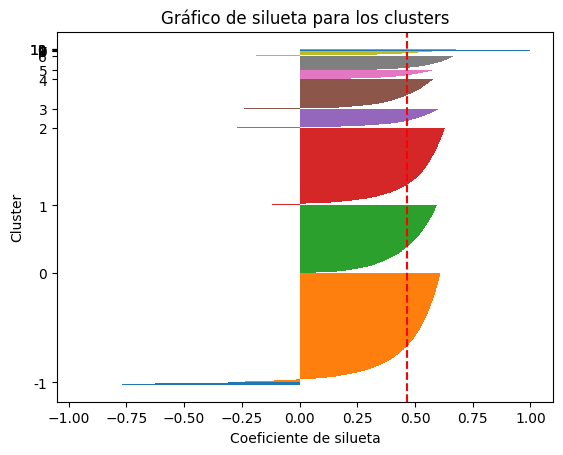

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals = silhouette_samples(X, clusters1)

y_ticks = []
y_lower, y_upper = 0, 0

for i, c in enumerate(np.unique(clusters1)):
    cluster_silhouette_vals = silhouette_vals[clusters1 == c]
    cluster_silhouette_vals.sort()

    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    y_lower += len(cluster_silhouette_vals)
    y_ticks.append((y_lower + y_upper) / 2.)

silhouette_avg = silhouette_score(X, clusters1)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(clusters1))
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')
plt.title('Gráfico de silueta para los clusters')

Ahora bien, lo verdaderamente relevante es el análisis de los resultados. Qué caracteriza a cada cluster de forma individual?. Para esto etiquetamos cada observación al cluster, aclarando que se está utilizando el segundo modelo:

In [ ]:
df['cluster'] = clusters1
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,num_chars,num_words,num_tokens-gpt4,num_tokens,clean_text,clean_text_corpus,polarity,subjectivity,cluster
750832,Te8_04uKwNa3JlU3FhP_lA,2SbO2QwjvSA1s3OsyBHlHQ,f-xTgL53Bd_zPsDTn1_37g,4.0,0,0,0,went to see a movie this evening and was disap...,2019-12-31 05:05:38,832,160,187,149,"[went, see, movie, evening, disappointed, expe...",went see movie evening disappointed experience...,0.035714,0.528571,0
709534,UOadBAGyp6ctjqHg6FQUzA,133riPDyZ45nsBk9_t29wA,_94_FAiPqGauzHfa4SahcA,3.5,0,0,0,the food was over seasoned and not worth the p...,2015-02-12 22:50:26,364,69,85,63,"[food, seasoned, worth, price, ordered, hibach...",food seasoned worth price ordered hibachi stea...,-0.233929,0.464286,1
1053918,Ebn2IJZdXXNckXJ6RjFgQA,ZqEdxDDIGeInfR30_S0r5A,DNw6b7igXQxm3rQkhhV8OA,4.0,3,0,0,i am so grateful to paws pet grooming. my dog ...,2014-11-16 04:18:45,746,147,184,133,"[grateful, paw, pet, grooming, dog, ran, tall,...",grateful paw pet grooming dog ran tall dry gra...,0.068924,0.552083,0
356589,r7sCSGGdPw3R_uYD6dflBg,g99wh6Tkcr1zgcC6vDPZWQ,898K8ftMbdWe2Dc67QMC_Q,4.0,0,1,0,great breakfast had the crap and shrimp omelet...,2016-10-05 14:15:47,213,35,48,33,"[great, breakfast, crap, shrimp, omelette, swe...",great breakfast crap shrimp omelette sweet pot...,0.450000,0.792857,0
383709,o1X2MDs4e9H3dQcfUqkuiw,NDRP_nF-ZnhZI-9FbtHF3A,3WySw_caRJy7YVPLlWtBRw,4.0,0,0,0,excellent! very impressed. definitely a 'hidd...,2013-06-19 09:15:13,479,79,118,73,"[excellent, impressed, definitely, hidden, gem...",excellent impressed definitely hidden gem clea...,0.556061,0.652020,0


# Análisis de Resultados



In [ ]:
vars_int = ['polarity','subjectivity','stars']
df_grouped = df.groupby('cluster')

for name, group in df_grouped:
    group_vars= group[vars_int]

    stats = group_vars.describe()
    print(f"Estadísticas Cluster {name}")
    print(stats)

Estadísticas Cluster -1
         polarity  subjectivity       stars
count  373.000000    373.000000  373.000000
mean    -0.167676      0.736016    2.902145
std      0.660547      0.302464    1.297411
min     -1.000000      0.000000    1.000000
25%     -0.740000      0.566667    1.500000
50%     -0.341146      0.866667    3.000000
75%      0.458333      1.000000    4.000000
max      1.000000      1.000000    5.000000
Estadísticas Cluster 0
           polarity  subjectivity    stars
count  16273.000000  16273.000000  16273.0
mean       0.291909      0.575861      4.0
std        0.225594      0.131887      0.0
min       -0.750000      0.000000      4.0
25%        0.158673      0.496348      4.0
50%        0.292619      0.573054      4.0
75%        0.430333      0.655714      4.0
max        1.000000      1.000000      4.0
Estadísticas Cluster 1
           polarity  subjectivity    stars
count  10056.000000  10056.000000  10056.0
mean       0.235048      0.557792      3.5
std        0.23993

A partir de los resultados del análisis de los clusters de las reseñas, los resultados del análisis son los siguientes:

**Cluster -1**
- Son los resultados que no fueron clasificados y que fueron detectados por DBSCAN como anomalías
- 373 observaciones
- Polaridad negativa (-0.16) y alta subjectividad (0.74)
- Puntuación de estrellas baja, promedio 2.9. Reseñas negativas.

**Cluster 0:**
- El más grande con 16273 observaciones.
- Alta polaridad (0.29) y subjectividad media (0.58). Contenido subjetivo positivo.
- Puntuación de estrellas siempre 4. Reseñas muy positivas.

**Cluster 1:**
- 10056 observaciones.
- Polaridad (0.23) y subjectividad (0.55) moderadas. Contenido subjetivo positivo, no acompañado de una "buena valoración"
- Puntuación de estrellas siempre 3.5. Reseñas medias.

**Cluster 2:**
- 11536 observaciones.
- Polaridad alta (0.33), subjectividad media (0.58). Contenido subjetivo positivo acompañado de una buena valoración
- Puntuación de estrellas siempre 4.5. Reseñas muy positivas.

**Cluster 3:**
- 2865 observaciones.
- Polaridad neutra (0.11), subjectividad media (0.52). En este grupo la media de la polaridad es de 0.11, lo que indica que hay subjetividad pero tendencia a la neutralidad en la reseña, pero la calificación es negativa.
- Puntuación siempre 2.5.

**Cluster 4:**
- 4353 observaciones
- Polaridad neutra (0.16), subjectividad media (0.54). Resultado similar a la del cluster 3, pero con aparente mejor calificación.
- Puntuación siempre 3. Reseñas medias con tendencia negativa.

**Cluster 5:**
- 1412 observaciones
- Polaridad neutra (0.04), subjectividad media (0.51). Resultado similar a las de los cluster 3 y 4, pero con una calificación baja
- Puntuación siempre 2. Reseñas negativas.

**Cluster 6:**
- 2123 observaciones
- Alta polaridad (0.35), subjectividad media (0.57). Contenido subjetivo positivo acompañado de una excelente calificación.
- Puntuación siempre 5. Reseñas extremadamente positivas.

**Cluster 7:**
- 751 observaciones
- Polaridad casi neutra (-0.03), subjectividad media (0.49). Esta es la tendencia de los grupos 3, 4 y 5, con muy mala calificación.
- Puntuación siempre 1.5. Reseñas muy negativas.

**Cluster 8:**
- 15 observaciones
- Polaridad y subjectividad 1. Estos son reseñas positivas al extremo y totalmente subjetivos, pero no tuvieron una calificación de 5.
- Puntuación siempre 4.5.

**Cluster 9:**
- 16 observaciones
- Polaridad y subjectividad casi 0. Son reseñas muy neutrales y totalmente objetivas, con una calificación muy mala.
- Puntuación siempre 1.5.

**Cluster 10:**
- 196 observaciones
- Polaridad casi neutra (-0.02), subjectividad media (0.47)Esta es la tendencia de los clústers 3, 4, 5 y 7, pero con la peor calificación posible.
- Puntuación siempre 1. Reseñas muy negativas.

**Cluster 11:**
- 14 observaciones
- Polaridad y subjectividad 1. Sigue la conducta del cluster 8, pero sin calificación de 5.
- Puntuación siempre 4.

**Cluster 12:**
- 17 observaciones
- Polaridad negativa (-0.62), alta subjectividad (0.84). Estos son comentarios altamente subjetivos, pero con sentimientos negativos.
- Puntuación siempre 2.5.

Los atributos de polaridad y subjetividad se presentan en el siguiente gráfico:

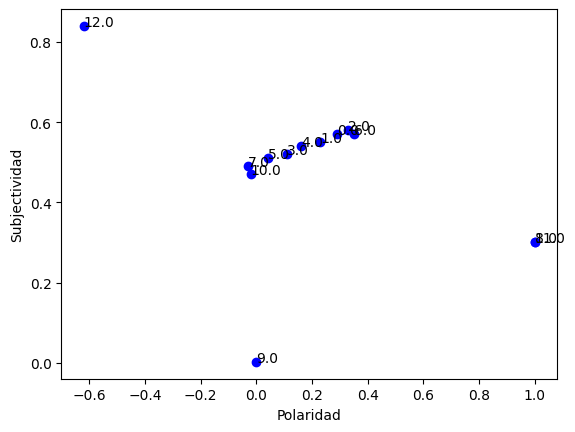

In [ ]:
data = {'cluster': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        'polaridad': [0.29, 0.23, 0.33, 0.11, 0.16, 0.04, 0.35, -0.03, 1, 0, -0.02, 1, -0.62],
        'subjectividad': [0.57, 0.55, 0.58, 0.52, 0.54, 0.51, 0.57, 0.49, 0.3, 0.002, 0.47, 0.3, 0.84]}

grafico = pd.DataFrame(data)

fig, ax = plt.subplots()

for index, row in grafico.iterrows():
    ax.scatter(row['polaridad'], row['subjectividad'], c='blue')

    ax.text(row['polaridad']+0.01, row['subjectividad'], str(row['cluster']))

ax.set_xlabel('Polaridad')
ax.set_ylabel('Subjectividad')

plt.show()

# Conclusiones


Inicialmente, la hipótesis era de verificar si con el método DBSCAN se podía hacer un ejercicio de clusterización viable para un total de más de un millón de observaciones con datos de reseñas. No obstante, se encontraron restricciones, las cuales listaremos y presentaremos las decisiones que tomamos para batirlas:

1. Google Colab tiene una restrucción de uso de RAM de 12.7 GB. Al intentar procesar datos de texto de más de un millón de reseñas, se alcanzaba el límite, lo cual desconectaba el entorno de ejecución. Las soluciones que se evaluaron eran: 1. utilizar una submuestra representativa de todo el conjunto de datos. 2. Ejecutar en un entorno local sin observar la restricción de tiempo y de trabajo colaborativo. 3. Adquirir licenciamiento de google colab Pro. Se tomó la decisión de procesar una submuestra de 50000 observaciones, para mantener la dinámica de trabajo, sin desconocer los resultados del análisis exploratorio del dataset completo.

2. DBSCAN no clusterizó nada con el texto vectorizado: Tal y como se había presentado anteriormente, al intentar clusterizar la variable text, los resultados fueron que todas las observaciones iban al cluster -1. Esto pudo ocurrir como consecuencia de la longitud de los textos y la falta de estructura de los mismos. Al parecer, el algoritmo encontró un mundo totalmente diferente en cada observación. En la búsqueda de una solución al texto procesado previamente, se decidió analizar la polaridad y la subjetividad, en los términos planteados a lo largo del ejercio, con el fin de poder agrupar reseñas de acuerdo con las sensaciones expresadas por quienes las redactaron.

3. Las métricas de rendimiento de los modelos pudieron no ser las mejores. No se pudo ejecutar el Índice de Dunn por las restricciones computacionales del entorno gratuito de Colab. No obstante, con los clústeres estimados y el procesamiento ejecutado fue posible hacer análisis y caracterización de las reseñas.


